# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Armand Maulana
- Email: maulana.studio15@gmail.com
- Id Dicoding: armand_maulana

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penyewaan sepeda berdasarkan jam dalam sehari?
- Bagaimana pola penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)?

## Menyiapkan semua library yang dibutuhkan

Karena kita menggunakan Google Colab, maka terlebih dahulu perlu untuk menghubungkannya dengan Google Drive dimana dataset kita tersimpan.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Setelah terhubung, kita dapat mengakses file atau direktori yang ada di Google Drive secara langsung. Hal ini memudahkan kita untuk mengakses dan menyimpan file secara langsung dari Google Colab tanpa perlu mengunggah atau mengunduh secara manual.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Untuk menjawab kedua pertanyaan di atas, maka kita memerlukan setidaknya dua library berikut:
- Pandas: untuk manipulasi dan analisis data tabular
- Matplotlib & Seaborn: untuk visualisasi data, agar memudahkan untuk melihat tren

## Data Wrangling

### Gathering Data

Setelah tahap persiapan selesai, kita bisa masuk ke tahap gathering data. Tahap pertama, yaitu Gathering Data dimana kita akan mengumpulkan semua data yang dibutuhkan dalam project ini.

**- Karakteristik Dataset**

Sebelum itu, ada baiknya mengenali karakteristik dataset yang akan digunakan dalam project ini. Dataset Bike Sharing ini terdiri dari dua file csv, yaitu hour.csv dan day.csv. Dalam hour.csv berisi data penyewaan sepeda per jam sedangkan dalam day.csv berisi data penyewaan sepeda per hari. Keduanya memiliki kolom yang sama, tetapi hanya hour.csv saja yang memiliki kolom 'hr' sehingga memiliki baris yang lebih banyak dibanding day.csv. Berikut keterangan untuk setiap kolomnya:

|**Column**           |**Description** |
|:--------------------|:---------------|
|instant              |record index|
|dteday               |date|
|season               |season (1:spring, 2:summer, 3:fall, 4:winter)|
|yr                   |year (0: 2011, 1:2012)|
|mnth                 |month (1 - 12)|
|hr                   |hour (0 - 23), not available in day.csv|
|holiday              |weather day is holiday or not|
|weekday              |day of the week (0:sun, 1:mon, 2:tue, 3:wed, 4:thu, 5: fri, 6:sat)|
|workingday           |if day is neither weekend nor holiday is 1, otherwise is 0|
|weathersit           |1: Clear, Few clouds, Partly cloudy, Partly cloudy
|                     |2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
|                     |3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
|                     |4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
|temp                 |Normalized temperature in Celsius. The values are divided to 41 (max)|
|atemp                |Normalized feeling temperature in Celsius. The values are divided to 50 (max)|
|hum                  |Normalized humidity. The values are divided to 100 (max)|
|windspeed            |Normalized wind speed. The values are divided to 67 (max)|
|casual               |count of casual users|
|registered           |count of registered users|
|cnt                  |count of total rental bikes including both casual and registered|


**- Memuat Tabel**

Pada project ini kita perlu untuk memuat tabel dari dataset bike sharing ([sumber](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)) terlebih dahulu sebelum kita menganalisisnya.

In [3]:
bike_hour = pd.read_csv('/content/drive/MyDrive/dicoding data science/project/bike sharing/hour.csv')
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike_day = pd.read_csv('/content/drive/MyDrive/dicoding data science/project/bike sharing/day.csv')
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Sekarang kita masuk ke tahap kedua dalam proses data wrangling yaitu assessing data. Seperti yang telah kita bahas sebelumnya, pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

**- Memeriksa Tipe Data**

Sebagai permulaan, kita memeriksa tipe data dari tiap kolom yang terdapat dalam data. Proses ini dapat dilakukan menggunakan method info() seperti kode berikut.

In [5]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, tidak terdapat nilai null dalam data tersebut. Namun, tipe data yang ada pada kolom 'dteday' masih berupa object. Selain itu pada kolom 'season' dan 'weekday' memiliki tipe data int64 yang memiliki nilai angka. Hal tersebut membuat kita lebih sulit untuk memahami datanya. Sehingga perlu dilakukan transformasi data dengan mengubah tipe data pada kolom 'dteday' serta mengubah nilai yang ada pada kolom 'season' dan 'weekday'.

**- Memeriksa Duplikasi Data**

Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.

In [7]:
print("Jumlah duplikasi bike_hour: ", bike_hour.duplicated().sum())
print("Jumlah duplikasi bike_day: ", bike_day.duplicated().sum())

Jumlah duplikasi bike_hour:  0
Jumlah duplikasi bike_day:  0


Jika diperhatikan, tidak ada duplikasi data yang ditemukan.

**- Memeriksa Nilai Unik**

Selanjutnya kita memeriksa data khususnya pada kolom yang berisi jenis data kategorikal dan boolean. Hal tersebut untuk memastikan bahwa nilai pada kolom-kolom tersebut berada dalam rentang nilai yang ada.


**a. Rentang nilai yang ada pada kolom 'season', yaitu:**

1 = spring; 2 = summer; 3 = fall; 4 = winter.

**b. Rentang nilai yang ada pada kolom 'yr', yaitu:**

0 = 2011; 1 = 2012

**c. Rentang nilai yang ada pada kolom 'mnth', yaitu:**

1 = jan; 2 = feb; 3 = mar; 4 = apr; 5 = mei; 6 = jun; 7 = jul; 8 = agu; 9 = sep; 10 = okt; 11 = nov; 12 = des.

**d. Rentang nilai yang ada pada kolom 'hr', yaitu:**

0 - 23

**e. Rentang nilai yang ada pada kolom 'holiday', yaitu:**

0 = not holiday; 1 = holiday.

**f. Rentang nilai yang ada pada kolom 'weekday', yaitu:**

0 = minggu; 1 = senin; 2 = selasa; 3 = rabu; 4 = kamis; 5 = jumat; 6 = sabtu.

**g. Rentang nilai yang ada pada kolom 'workingday', yaitu:**

0 = libur/akhir pekan; 1 = hari kerja

**h. Rentang nilai yang ada pada kolom 'weathersit', yaitu:**

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



In [8]:
unique_season = bike_hour['season'].unique()
print('season =', unique_season)

unique_yr = bike_hour['yr'].unique()
print('yr =',unique_yr)

unique_mnth = bike_hour['mnth'].unique()
print('mnth =',unique_mnth)

unique_hr = bike_hour['hr'].unique()
print('hr =',unique_hr)

unique_holiday = bike_hour['holiday'].unique()
print('holiday =',unique_holiday)

unique_weekday = bike_hour['weekday'].unique()
print('weekday =',unique_weekday)

unique_workingday = bike_hour['workingday'].unique()
print('workingday =',unique_workingday)

unique_weathersit = bike_hour['weathersit'].unique()
print('weathersit =',unique_weathersit)

season = [1 2 3 4]
yr = [0 1]
mnth = [ 1  2  3  4  5  6  7  8  9 10 11 12]
hr = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
holiday = [0 1]
weekday = [6 0 1 2 3 4 5]
workingday = [0 1]
weathersit = [1 2 3 4]


In [9]:
unique_season = bike_day['season'].unique()
print('season =', unique_season)

unique_yr = bike_day['yr'].unique()
print('yr =',unique_yr)

unique_mnth = bike_day['mnth'].unique()
print('mnth =',unique_mnth)

unique_holiday = bike_day['holiday'].unique()
print('holiday =',unique_holiday)

unique_weekday = bike_day['weekday'].unique()
print('weekday =',unique_weekday)

unique_workingday = bike_day['workingday'].unique()
print('workingday =',unique_workingday)

unique_weathersit = bike_day['weathersit'].unique()
print('weathersit =',unique_weathersit)

season = [1 2 3 4]
yr = [0 1]
mnth = [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday = [0 1]
weekday = [6 0 1 2 3 4 5]
workingday = [0 1]
weathersit = [2 1 3]


Jika diperhatikan, tidak ditemukan nilai unik yang berada di luar rentang nilai pada tiap kolom yang telah diperiksa.

**- Mencocokkan Nilai bike_hour dan bike_day**

Kita perlu mencocokkan data pada kedua dataframe agar hasil analisis kita tidak bias dan tidak terjadi inkonsisten data.

In [10]:
total_bhour = bike_hour[['casual', 'registered', 'cnt']].sum()
print(total_bhour)

total_bday = bike_day[['casual', 'registered', 'cnt']].sum()
print(total_bday)

casual         620017
registered    2672662
cnt           3292679
dtype: int64
casual         620017
registered    2672662
cnt           3292679
dtype: int64


Jika diperhatikan, total nilai pada kedua dataframe sama yang berarti informasi yang dimuat di dalamnya sama.

**- Memeriksa Parameter Statistik**

Selanjutnya kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam data. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada dataframe kita.

In [11]:
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan rangkuman parameter statistik bike_hour, dalam kurun waktu 2011-2012 terdapat sebanyak 17,379 baris data dengan rata-rata pengguna casual sebanyak 36 pengguna/jam dan rata-rata pengguna terdaftar (registered) sebanyak 154 pengguna/jam.

In [12]:
bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan rangkuman parameter statistik bike_day, dalam kurun waktu 2011-2012 terdapat sebanyak 731 baris data dengan rata-rata pengguna casual sebanyak 848 pengguna/hari dan rata-rata pengguna terdaftar (registered) sebanyak 3,656 pengguna/hari.

### Cleaning Data

Sekarang kita akan memasuki proses terakhir dalam data wrangling yaitu pembersihan atau cleaning data. Pada tahap ini, kita akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.

**- Transformasi Tipe Data pada Kolom 'dteday'**

Langkah ini diperlukan agar dapat membantu dalam analisis data terkait tanggal dan waktu, seperti pemilihan data berdasarkan rentang waktu, ekstraksi komponen waktu (tanggal, bulan, tahun), atau plotting data berdasarkan sumbu waktu. Berikut kode untuk mengubah tipe data pada kolom 'dteday'.

In [13]:
bike_hour['dteday'] = pd.to_datetime(bike_hour['dteday'])
print(bike_hour.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [14]:
bike_day['dteday'] = pd.to_datetime(bike_day['dteday'])
print(bike_day.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**- Tranformasi Data pada Kolom 'season'**

Langkah ini diperlukan agar dapat membantu memahami informasi yang ada pada kolom 'season'. Dengan memahami informasi kita dapat lebih mudah dalam melakukan analisis data.

In [15]:
bike_hour['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
bike_day['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**- Transformasi Data pada Kolom 'weekday'**

Langkah ini diperlukan agar dapat membantu memahami informasi yang ada pada kolom 'weekday'. Dengan memahami informasi kita dapat lebih mudah dalam melakukan analisis data.

In [17]:
bike_hour['weekday'].replace({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'}, inplace=True)
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,0,saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,1,1,0,saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,1,2,0,saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,1,3,0,saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,1,4,0,saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
bike_day['weekday'].replace({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'}, inplace=True)
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Setelah memastikan data kita telah bersih maka kita melangkah ke tahap selanjutnya.

## Exploratory Data Analysis (EDA)

Pada tahap ini, kita akan mengeksplorasi data untuk dapat lebih mengenali data yang sedang ditangani yang kemudian dapat membantu membuat strategi analisis yang paling efisien.

### Explorasi Data Bike Sharing (bike_day dan bike_hour)

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data bikeshare menggunakan method describe().

In [19]:
bike_day.describe(include="all")

<ipython-input-19-711fbbda0249>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,fall,NaN,NaN,NaN,saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,6.519836,0.028728,NaN,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,0.167155,NaN,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,4.000000,0.000000,NaN,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Dari data tersebut, waktu penyewaan sepeda paling sering dilakukan pada musim gugur (fall) dan pada hari sabtu (saturday). Jumlah penyewaan sepeda terbanyak dalam sehari yaitu sebanyak 8,714 sepeda dengan rata-rata 4,504 sepeda/hari. Penyewaan sepeda terbanyak dalam sehari oleh pengguna casual sebanyak 3,410 dengan rata-rata 848 sepeda/hari dan pengguna terdaftar (registered) sebanyak 6,946 sepeda dengan rata-rata 3,656 sepeda/hari.

Selanjutnya kita coba melihat jumlah penyewaan berdasarkan jam dalam sehari.

In [20]:
in_a_day = bike_hour.groupby('hr')[['casual','registered']].agg(['max', 'mean', 'min', 'std'])
print(in_a_day)

   casual                           registered                            
      max       mean min        std        max        mean min         std
hr                                                                        
0      68  10.158402   0  10.667953        234   43.739669   0   34.019585
1      49   6.504144   0   7.735334        139   26.871547   0   27.344153
2      44   4.772028   0   6.514780        104   18.097902   0   21.303895
3      26   2.715925   0   4.315795         61    9.011478   0    9.743691
4      13   1.253945   0   1.887669         22    5.098996   0    3.134479
5      16   1.411437   0   1.790581         64   18.478382   0   12.674751
6      19   4.161379   0   3.691509        203   71.882759   0   53.535307
7      40  11.055021   0   8.356205        572  201.009629   1  157.120459
8      69  21.679505   0  13.741229        808  337.331499   4  229.698404
9     142  30.891334   0  24.472856        399  188.418157   6   84.633490
10    209  46.477304   0 

Berdasarkan hasil aggregasi di atas, penyewaan sepeda terbanyak berdasarkan jam untuk kedua tipe users masing-masing sebanyak 367 untuk pengguna casual pada pukul 16:00 dan sebanyak 886 untuk pengguna terdaftar (registered) pada pukul 18:00. Namun untuk rata-rata penyewaan sepeda tertinggi berdasarkan jam dalam sehari sebanyak 76 sepeda untuk pengguna casual pada pukul 14:00 dan sebanyak 387 sepeda untuk pengguna terdaftar (registered) pada pukul 17:00.

Selanjutnya mari kita melihat jumlah penyewaan berdasarkan hari dalam seminggu.

In [21]:
day_order = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
bike_day['weekday'] = pd.Categorical(bike_day['weekday'], categories=day_order, ordered=True)

in_a_week = bike_day.groupby('weekday')[['casual', 'registered']].agg(['max', 'mean', 'min', 'std'])
print(in_a_week)

          casual                              registered                     \
             max         mean min         std        max         mean   min   
weekday                                                                       
sunday      3283  1338.295238  54  809.324777       5657  2890.533333   451   
monday      3065   674.133333   2  493.777298       6435  3663.990476    20   
tuesday     1348   556.182692   9  342.748705       6697  3954.480769   573   
wednesday   2562   551.144231   9  401.808954       6946  3997.394231   432   
thursday    1405   590.961538  15  371.680307       6781  4076.298077   416   
friday      2469   752.288462  38  483.422400       6917  3938.000000  1129   
saturday    3410  1465.257143  57  927.082884       5966  3085.285714   570   

                        
                   std  
weekday                 
sunday     1179.713036  
monday     1504.215925  
tuesday    1549.462149  
wednesday  1723.710208  
thursday   1642.753330  
friday   

Berdasarkan hasil aggregasi di atas, puncak penyewaan sepeda terjadi pada Hari Sabtu untuk pengguna casual dan Hari Rabu untuk pengguna terdaftar (registered). Untuk rata-rata harian penyewaan sepeda tertinggi terjadi pada Hari Sabtu sebanyak 1,465 sepeda untuk pengguna casual dan Hari Kamis sebanyak 4,076 sepeda untuk pengguna terdaftar (registered).

Selanjutnya mari kita melihat jumlah penyewaan berdasarkan musim.

In [22]:
season_order = ['spring', 'summer', 'fall', 'winter']
bike_day['season'] = pd.Categorical(bike_day['season'], categories=season_order, ordered=True)

in_season = bike_day.groupby('season')[['casual', 'registered']].agg(['max', 'mean', 'min', 'std'])
print(in_season)

       casual                               registered                    \
          max         mean  min         std        max         mean  min   
season                                                                     
spring   3155   334.928177    9  387.655561       5315  2269.204420  416   
summer   3410  1106.097826  120  737.590829       6456  3886.233696  674   
fall     3160  1202.611702  118  595.975032       6917  4441.691489  889   
winter   3031   729.112360    2  606.318118       6946  3999.050562   20   

                     
                std  
season               
spring  1200.269751  
summer  1353.375628  
fall    1304.626949  
winter  1444.782557  


Berdasarkan hasil aggregasi di atas, rata-rata penyewaan sepeda tertinggi terjadi pada musim gugur (fall) untuk kedua jenis users dimana sebanyak 1,203 sepeda/hari untuk pengguna casual dan sebanyak 4,442 sepeda/hari untuk pengguna terdaftar (registered).

Selanjutnya kita sebaiknya juga melihat persentase penyewaan bike sharing berdasarkan tipe pengguna.

In [23]:
# Menghitung total 'casual' dan 'registered'
total_casual = bike_day['casual'].sum()
total_registered = bike_day['registered'].sum()

# Menghitung persentase
percentage_casual = (total_casual / (total_casual + total_registered)) * 100
percentage_registered = (total_registered / (total_casual + total_registered)) * 100

print("Casual =", percentage_casual, "%")
print("Registered =", percentage_registered, "%")

Casual = 18.830168382645258 %
Registered = 81.16983161735475 %


Daapt dilihat bahwa jumlah pengguna terdaftar (registered) mendominasi penggunaan bike sharing yaitu sebesar 81.17% dibanding pengguna casual yang hanya sebesar 18.83% saja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi penyewaan sepeda berdasarkan jam dalam sehari?

Pada visualisasi ini, kita menjelajahi pola waktu penyewaan sepeda dalam sehari. Grafik dibawah ini menggambarkan distribusi jumlah penyewaan sepeda setiap jam, memberikan wawasan yang jelas tentang preferensi waktu pengguna dalam memanfaatkan layanan sepeda. Dari pukul berapa aktivitas penyewaan sepeda paling tinggi hingga kapan tren tersebut cenderung menurun? Mari kita eksplorasi pola-pola menarik dalam waktu sehari melalui grafik ini.

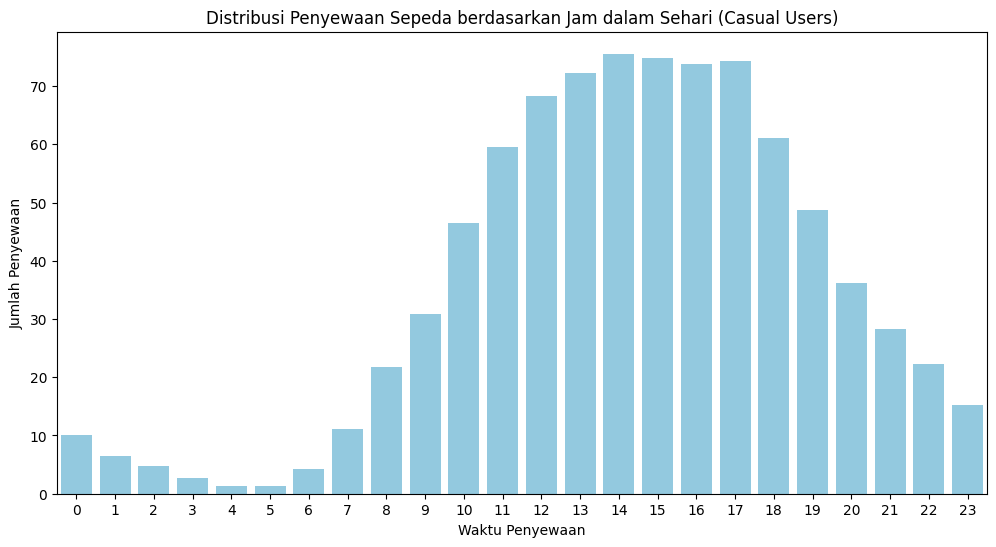

In [24]:
hourly_counts = bike_hour.groupby('hr')['casual'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='skyblue')
plt.title('Distribusi Penyewaan Sepeda berdasarkan Jam dalam Sehari (Casual Users)')
plt.xlabel('Waktu Penyewaan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Pada grafik di atas menggambarkan distribusi penyewaan sepeda oleh pengguna casual berdasarkan jam dalam sehari. Dari grafik tersebut, terlihat bahwa terjadi peningkatan yang signifikan dalam rentang waktu pukul 6 pagi hingga mencapai puncaknya pada pukul 2 siang kemudian terjadi penurunan mulai dari pukul 6 petang. Pada jam-jam dini hari (pukul 0 - 5 subuh) aktivitas penyewaan sepeda oleh pengguna casual sangat minim.

Selanjutnya, mari kita lihat distribusi penyewaan sepeda oleh pengguna terdaftar (registerd).

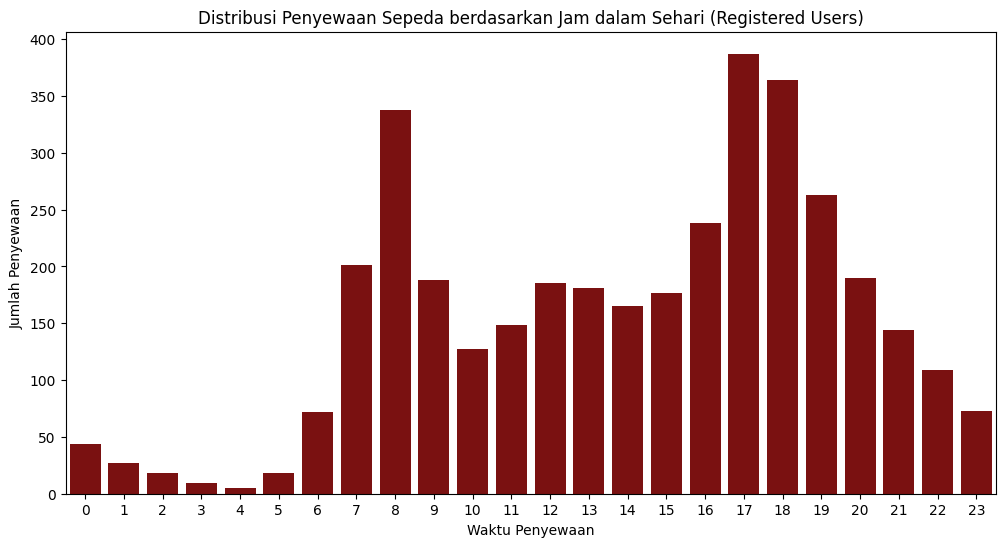

In [25]:
hourly_counts = bike_hour.groupby('hr')['registered'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='darkred')
plt.title('Distribusi Penyewaan Sepeda berdasarkan Jam dalam Sehari (Registered Users)')
plt.xlabel('Waktu Penyewaan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Berdasarkan grafik di atas, pola aktivitas menunjukkan tren yang berbeda dibandingkan dengan pengguna casual. Terlihat bahwa puncak aktivitas pengguna terdaftar terjadi pada jam-jam padat di sepanjang hari. Pada pukul 5 sore, tercatat hampir 400 pengguna terdaftar (registered) menyewa sepeda, yang merupakan nilai tertinggi dalam rentang waktu 24 jam. Rentang waktu Pukul 8 pagi hingga Pukul 9 malam menunjukkan tingkat aktivitas yang tinggi, dengan rata-rata penyewaan di atas 150 pengguna terdaftar (registered) per jam. Berbeda dengan pengguna casual, pengguna terdaftar menunjukkan kecenderungan aktifitas tinggi bahkan pada jam-jam dini pagi, menandakan kebutuhan yang berkelanjutan dari segmen pengguna ini di sepanjang waktu.

Selanjutnya, mari kita lihat secara keseluruhan.

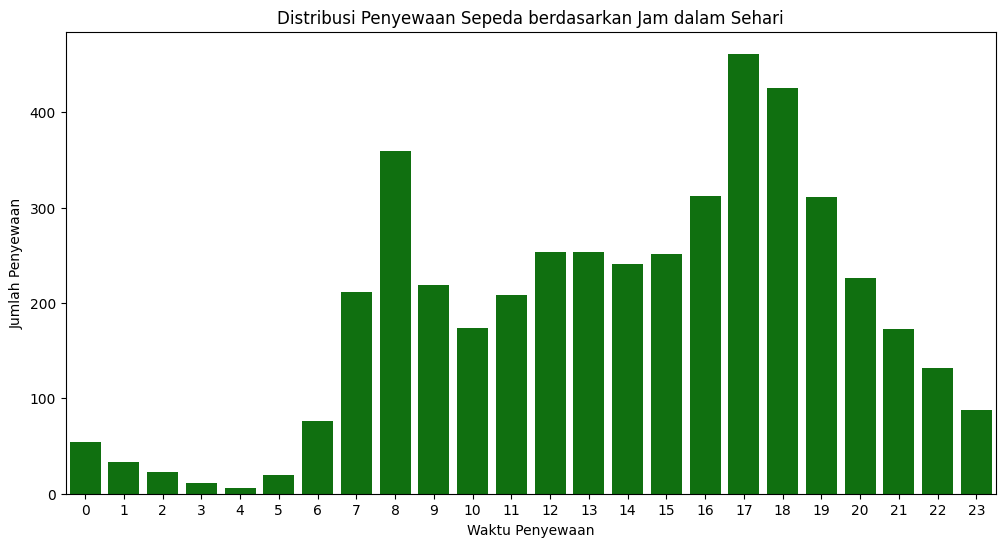

In [26]:
hourly_counts = bike_hour.groupby('hr')['cnt'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='green')
plt.title('Distribusi Penyewaan Sepeda berdasarkan Jam dalam Sehari')
plt.xlabel('Waktu Penyewaan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Berdasarkan garfik di atas, terlihat bahwa pola yang ditunjukkan tidak jauh berbeda dengan pola yang ditunjukkan oleh grafik yang dimiliki pengguna terdaftar (registered). Hal tersebut dikarenakan pengguna terdaftar (registered) cenderung memiliki tingkat aktivitas yang lebih tinggi (81,17%) dibanding dengan casual users (18,83%) pada setiap jam dalam sehari.

### Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)?

Pada visualisasi ini, kita menyelidiki bagaimana pola penyewaan sepeda berfluktuasi selama berbagai musim: spring (musim semi), summer (musim panas), fall (musim gugur), dan winter (musim dingin). Grafik di bawah ini memberikan gambaran visual tentang bagaimana tingkat aktivitas penyewaan sepeda mengalami perubahan selama setiap musim.

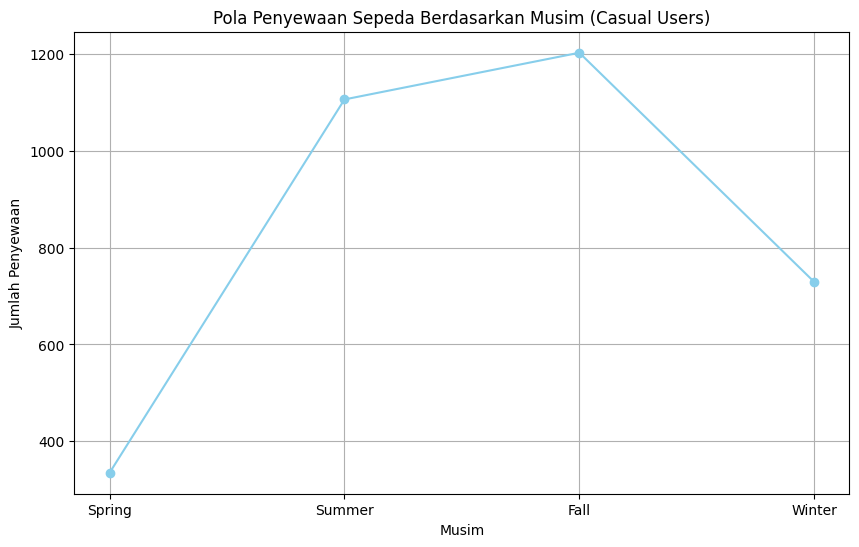

In [27]:
seasonal_counts = bike_day.groupby('season')['casual'].mean().reset_index()

season_names = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(10, 6))
plt.plot(season_names, seasonal_counts['casual'], marker='o', linestyle='-', color='skyblue')
plt.title('Pola Penyewaan Sepeda Berdasarkan Musim (Casual Users)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

Grafik di atas menunjukkan bahwa musim gugur (fall) memiliki tingkat aktivitas penyewaan tertinggi oleh pengguna casual, mencapai di atas angka 1,200 sepeda. Musim panas (summer) juga menunjukkan tingkat aktivitas yang signifikan di angka 1,100-an sepeda, diikuti oleh musim dingin (winter) di angka 700-an. Musim semi (spring), meskipun memiliki jumlah penyewaan sepeda yang lebih rendah, masih menyumbang di angka 300-an penyewaan sepeda oleh pengguna casual.

Selanjutnya, mari kita lihat untuk pengguna terdaftar (registered)

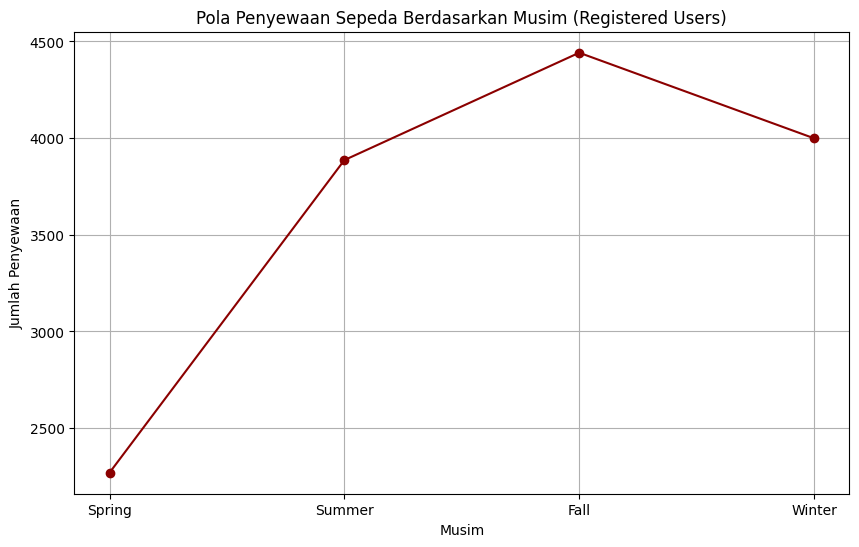

In [28]:
seasonal_counts = bike_day.groupby('season')['registered'].mean().reset_index()

season_names = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(10, 6))
plt.plot(season_names, seasonal_counts['registered'], marker='o', linestyle='-', color='darkred')
plt.title('Pola Penyewaan Sepeda Berdasarkan Musim (Registered Users)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

Grafik di atas menunjukkan bahwa musim gugur (fall) memiliki tingkat aktivitas penyewaan tertinggi oleh pengguna terdaftar (registered), hampir mencapai 4,500 sepeda. Musim dingin (winter) juga menunjukkan tingkat aktivitas yang signifikan dengan hampir menyentuh angka 4,000 sepeda, diikuti oleh musim panas (summer). Musim semi (spring), meskipun memiliki jumlah penyewaan yang lebih rendah, tetap menyumbang di atas angka 2,000 penyewaan sepeda oleh pengguna terdaftar (registered).

Selanjutnya, mari kita lihat secara keseluruhan.

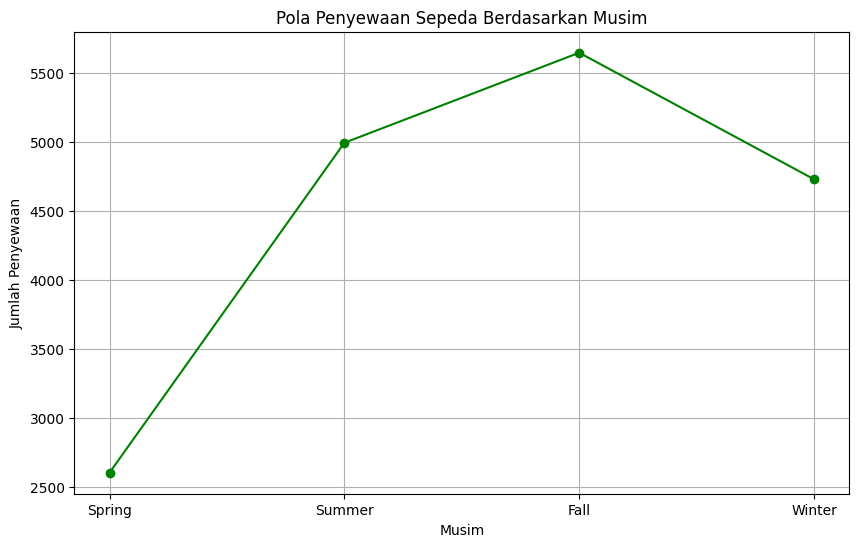

In [29]:
seasonal_counts = bike_day.groupby('season')['cnt'].mean().reset_index()

season_names = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(10, 6))
plt.plot(season_names, seasonal_counts['cnt'], marker='o', linestyle='-', color='green')
plt.title('Pola Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

Grafik di atas menunjukkan bahwa pola yang ditunjukkan tidak jauh berbeda dengan pola yang ditunjukkan oleh grafik yang dimiliki oleh kedua jenis pengguna. Penyewaan sepeda tertinggi terjadi pada musim gugur (fall) yang berada di atas 5,500 sepeda, diikuti musim panas (summer), dingin (winter) dan yang terakhir musim semi (spring).

## Conclusion

- Distribusi Penyewaan Sepeda Berdasarkan Jam dalam Sehari

  Berdasarkan analisis grafik distribusi penyewaan sepeda oleh pengguna casual dan terdaftar (registered) berdasarkan jam dalam sehari, dapat diidentifikasi perbedaan pola aktivitas di antara kedua kelompok pengguna. Pengguna casual cenderung menyewa sepeda dengan intensitas yang lebih tinggi pada jam-jam siang, mencapai puncaknya pada pukul 2 siang, sementara aktivitas pada jam-jam dini hari (pukul 0-5 subuh) sangat minim. Di sisi lain, pengguna terdaftar menunjukkan tingkat aktivitas yang tinggi sepanjang hari, mencapai puncak tertinggi pada pukul 5 sore. Rentang waktu Pukul 8 pagi hingga Pukul 9 malam menunjukkan tingkat aktivitas yang tinggi, dan pengguna terdaftar bahkan menunjukkan kecenderungan aktifitas tinggi pada jam-jam dini pagi. Terdapat konsistensi antara pola aktivitas kedua kelompok pengguna, dengan pengguna terdaftar mendominasi sebagian besar waktu. Persentase aktivitas pengguna terdaftar lebih tinggi (81,17%) dibandingkan dengan pengguna casual (18,83%) pada setiap jam dalam sehari. Informasi ini dapat membantu penyedia layanan sepeda untuk mengoptimalkan strategi pelayanan, manajemen inventaris, dan pemasaran yang sesuai dengan preferensi dan kebiasaan pengguna dalam rentang waktu tertentu.

- Pola Penyewaan Sepeda Berdasarkan Musim

  Secara keseluruhan, analisis grafik menunjukkan bahwa musim gugur (fall) memiliki tingkat aktivitas penyewaan tertinggi, baik oleh pengguna casual maupun pengguna terdaftar (registered). Pengguna casual menunjukkan puncak aktivitas pada musim gugur dengan lebih dari 1,200 penyewaan, sementara pengguna terdaftar mencapai puncak tertinggi dengan hampir 4,500 penyewaan sepeda. Musim panas juga menunjukkan tingkat aktivitas yang signifikan di kedua kelompok pengguna, diikuti oleh musim dingin. Meskipun musim semi memiliki jumlah penyewaan yang lebih rendah, tetapi masih memberikan kontribusi yang signifikan. Secara umum, musim gugur tetap menjadi musim yang paling diminati oleh pengguna dalam hal penyewaan sepeda. Perbedaan antara kedua jenis pengguna relatif konsisten, di mana pengguna terdaftar (registered) mendominasi sepanjang musim. Informasi ini dapat membantu penyedia layanan untuk menyesuaikan strategi pemasaran, manajemen inventaris, dan pelayanan sesuai dengan preferensi pengguna selama setiap musim.

In [42]:
pip freeze > requirements.txt